## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 

В данном исследовании будет проведен анализ рынка российского кинопроката с целью выявления текущих трендов.

Исследование состоит из нескольких этапов:

*- предобработка данных;*

*- анализ исходных данных;*

*- анализ российского кинопроката в период с 2010 по 2019 год;*

*- исследование фильмов, получивших государственную поддержку.*


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# открываем первую таблицу
movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Всего в датафрейме 7486 строк. Практически во всех колонках есть пропуски.

Посмотрим числовые значения для столбцов.

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
movies.describe()

,refundable_support,nonrefundable_support,budget
count,332.00,332.00,332.00
mean,"11,864,457.83","48,980,988.89","127,229,716.68"
std,"24,916,555.26","59,980,117.92","188,588,333.12"
min,0.00,0.00,0.00
25%,0.00,"25,000,000.00","42,000,000.00"
50%,0.00,"30,000,000.00","68,649,916.00"
75%,"15,000,000.00","40,375,000.00","141,985,319.50"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00"


Медианные значения сильно отличаются от средних. Можно предположить, что есть аномальные значения. В частности, необходимо будет проверить: 

refundable_support: максимальное значение, равное 180 млн.рублей;

nonrefundable_support: максимальное значение, равное 400 млн.рублей;

budget: есть значения, равные нулю, а максимальное значение более 2 млрд.рублей.

In [5]:
# открываем вторую таблицу
pu_numbers = pd.read_csv('/datasets/mkrf_shows.csv')
pu_numbers.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [6]:
pu_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В этом датафрейме 3158 строк, пропусков нет.

Посмотрим числовые значения для столбца "box_office".

In [7]:
pu_numbers['box_office'].describe()

count           3,158.00
mean       76,478,696.16
std       240,353,122.82
min                 0.00
25%            86,239.00
50%         2,327,987.55
75%        23,979,671.02
max     3,073,568,690.79
Name: box_office, dtype: float64

Здесь также есть аномальные значения. Минимальное значение - 0, максимальное - более 3 млрд.рублей.

В двух таблицах есть одинаковый столбец под названием "puNumber", по нему будем объединять эти таблицы. Результатом объединения будет датафрейм movies с добалением столбца "box_office" из датафрейма pu_numbers. Количество строк будет равняться значению 7486.

Определим к какому типу данных относится этот столбец в каждом датафрейме.

In [8]:
print(movies.puNumber.dtype)
print(pu_numbers.puNumber.dtype)

object
int64


Для того, чтобы объединить два датафрейма, столбец "puNumber" должен быть одного типа. Поскольку в таблице movies значения относятся к типу object, то привести их к типу int не получится. Приведем данные в обоих датафреймах к строковому типу.

In [9]:
movies['puNumber'] = movies['puNumber'].astype(str)
pu_numbers['puNumber'] = pu_numbers['puNumber'].astype(str)

Объединим таблицы:

In [10]:
df = pd.merge(movies, pu_numbers, how ='left', on ='puNumber')
df.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

По итогу объединения получился датафрейм с 7486 строками, что соответствует количеству строк в movies. Добавился столбец "box_office", количество значений в этом столбце - 3158 строк, что соответствует количеству строк в pu_numbers. Таблицы объединены без потери данных.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Найдем столбцы, в которых нужно изменить тип данных.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Приведём формат вывода даты и времени по столбцу "show_start_date" к формату DateTime:

In [13]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Посмотрим уникальные значения в столбце "ratings":

In [14]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Здесь есть некоторые значения со знаком процента. Уберем этот знак и поменяем тип данных на float.

In [15]:
df['ratings'] = df['ratings'].astype(str).apply(lambda x: float(x.split()[0].replace('%','')))
df['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

Здесь встречаются значения больше 10, в связи с тем, что мы убрали знак процента, и остались только числа. Поделим эти значения на 10.

In [16]:
df.loc[df['ratings'] > 10, 'ratings'] = df['ratings'] / 10
df['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

Еще раз проверим типы данных в столбцах:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Выведем количество пропущенных значений для каждого столбца.

In [18]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Пропущенные значения в столбцах "refundable_support", "nonrefundable_support", "budget" и "financing_source" связаны с тем, что в данных столбцах указываются значения только при наличии государственной поддержки. Т.е. если значения в этих столбцах пропущены, то фильм был снят без господдержки. 

Столбец "box_office" мы взяли из таблицы data_2. В этой таблице были данные только о прокате в российских кинотеатрах, поэтому в столбце "box_office" есть пропуски. 

Посмотрим пропущенные значения в колонке "production_country".

In [19]:
df[df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Пропущенные значения в этом столбце можно заполнить по столбцу "film_studio". В строке 3186 это ООО "Продюсерский центр ЕРАЛАШ". 	

In [20]:
df[df['film_studio'] == 'ООО "Продюсерский центр ЕРАЛАШ"'].head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1010,"Детский юмористический киножурнал ""Ералаш"", вы...",111001613,2013-05-16 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.20,"детский,комедия","3,545.00"
1282,"Детский юмористический киножурнал ""Ералаш"", вы...",111008613,2013-10-18 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, В.Панжев, А.Щеглов, Н.Хлопецкая...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","3,580.00"
2001,"Детский юмористический киножурнал ""Ералаш"", вы...",111006314,2014-06-19 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN


Заполним столбец "production_country" в строке 3186 значением "Россия".

In [21]:
df.loc[3186, 'production_country'] = 'Россия'

Пропущенные значения в столбце "ratings" оставим как есть. Пропущенных значений много и удалить мы их не можем.

Заполнить оставшиеся пропущенные значения в столбцах "film_studio", "production_country", "director", "producer" и "genres" не представляется возможным. Таких значений много и удалить их не будем, но заменим пропущенные значения на "не определен".                     

In [22]:
for column in ['film_studio', 'production_country', 'director', 'producer', 'genres']:
    df[column] = df[column].fillna('не определен')

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Для начала проверим данные на наличие явных дубликатов.

In [23]:
print('\nЧисло дубликатов:', df.duplicated().sum())


Число дубликатов: 0


Посмотрим есть ли дубликаты в колонке "title":

In [24]:
title_duplicated = df.loc[df['title'].duplicated(keep=False)].sort_values(by='title')
# посчитаем количество дубликатов
len(title_duplicated) 

1272

In [25]:
title_duplicated.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма","18,439,240.55"
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",750.00
1493,13-й район: Кирпичные особняки,221033314,2014-08-20 12:00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",NaN
4107,13.,221123710,2010-10-25 12:00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,не определен,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN
4307,13.,121018110,2010-09-30 12:00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,не определен,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN


Названия фильмов дублируются, но это не ошибка. Для каждого такого дубликата должно быть свое прокатное удостоверение. Проверим есть ли дубликаты среди прокатных удостоверений.

In [26]:
puNumber_duplicated = df.loc[df['puNumber'].duplicated(keep=False)].sort_values(by='puNumber')
puNumber_duplicated

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


В прокатных удостоверениях есть дубликаты. При чем один дубликат соответствует двум разным фильмам. Скорее всего такая ошибка связана с человеческим фактором. Оставим как есть, так как откорректировать эти данные не представляется возможным.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Посмотрим уникальные значения в столбце "type".

In [27]:
df['type'].sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

Здесь встречаются пробелы перед некоторыми значениями, из-за этого значения дублируются. Их необходимо удалить.

In [28]:
df['type'] = df['type'].str.strip()
df['type'].sort_values().unique()

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

Аналогичная проблема может быть и в других столбцах с категориальными значениями. Поэтому удалим лишние проблемы, если такие есть, в других столбцах.

In [29]:
for column in ['film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'genres']:
    df[column] = df[column].str.strip()

Посмотрим значения в колонке "production_country".

In [30]:
df['production_country'].value_counts()

США                                            2175
Россия                                         1822
СССР                                            377
Франция                                         302
Великобритания                                  259
                                               ... 
Франция - Испания - Тайвань                       1
2019                                              1
Австралия-Турция-США                              1
Великобритания - Франция - Швеция - Бельгия       1
Чехия - Германия                                  1
Name: production_country, Length: 935, dtype: int64

Поменяем знак тире на запятую в колонке "production_country":

In [31]:
df['production_country'] = df['production_country'].astype(str).str.replace(' - ', '-')
df['production_country'] = df['production_country'].astype(str).str.replace('-', ',')

Так же стоит отметить, что в столбцах "film_studio", "production_country", "director", "producer" и "genres" может быть разное количество пробелов между знаками запятой, что может приводить к появлению дубликатов. Приведем их к одному виду.

In [32]:
for column in ['film_studio', 'production_country', 'director', 'producer', 'genres']:
    df[column] = df [column].astype(str).str.replace(', ', ',')
  
df.head(15)    

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз,Кобальт Пикчерз,Бикон Пикчерз...",США,Кевин Костнер,"Дэвид Валдес,Кевин Костнер,Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,не определен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз,Кикстарт Продакшнз,Марк Плат...",США,Тимур Бекмамбетов,"Джим Лемли,Джейсон Нетер,Марк Е.Платт,Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз,Кикстарт Продакшнз,Марк Плат...",США,Тимур Бекмамбетов,"Джим Лемли,Джейсон Нетер,Марк Е.Платт,Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз,Кикстарт Продакшнз,Марк Плат...",США,Тимур Бекмамбетов,"Джим Лемли,Джейсон Нетер,Марк Е.Платт,Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,не определен,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,не определен,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс,Грин Стрит Филмз,Айкон Интерте...",США,Джон Туртурро,"Джон Пенотти,Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00,Художественный,"Пульсар Продюксьон,ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"",Телевидение ВНР","СССР,Венгрия",В.Титов,не определен,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN


Посмотим уникальные значения в колонке "age_restriction".

In [33]:
df['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

Здесь все в порядке.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Количественные значения содержатся в столбцах "refundable_support", "nonrefundable_support", "budget" и "box_office". При этом первые два содержат в себе информацию о количестве денежных средств, относящихся к господдержке. Столбец "budget" при этом уже включает в себя полный объём государственной поддержки. Посмотрим как эти столбцы соотносятся друг с другом.

In [34]:
# фильтруем датафрейм по столбцу 'financing_source', так как нам нужны только те фильмы, которым была оказана господдержка:
df[df['financing_source'].notna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян,М.Бабаханов,Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,не определен,"28,140.00"
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров,С.Комаров","Р.Давлетьяров,А.Котелевский,А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50"
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе,Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов,К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт,К.Феоктистов","С.Сельянов,А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00"
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"",ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук,М.Врубель,А.Андрющенко,Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN


Поскольку в столбце "budget" содержится полный объём государственной поддержки, то аномальными значениями в этом столбце будут такие значения, которые меньше суммы значений в столбцах "refundable_support" и "nonrefundable_support".

In [35]:
too_small_budget = df[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]
too_small_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина,А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"",ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров,Ф.Бондарчук,Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"",ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"",ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич,А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук,Т.Вайнштейн,Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук,Т.Вайнштейн,Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


В отфильтрованном датафрейме в столбце "budget" везде нули. Возможно эти фильмы снимались исключительно на средства господдержки. Тогда заполним нули суммой столбцов "refundable_support" и "nonrefundable_support".

In [36]:
df.loc[too_small_budget.index, 'budget'] = (df.loc[too_small_budget.index, 'refundable_support'] + \
                                            df.loc[too_small_budget.index, 'nonrefundable_support']) 

df.loc[too_small_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина,А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","23,000,000.00","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"",ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров,Ф.Бондарчук,Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","75,000,000.00",Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"",ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","80,000,000.00",Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"20,000,000.00",Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"",ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","160,000,000.00",Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич,А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","59,000,000.00",Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук,Т.Вайнштейн,Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","35,000,000.00",Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","6,000,000.00",Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук,Т.Вайнштейн,Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","70,000,000.00",Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","250,000,000.00",Фонд кино,5.60,фантастика,"1,038,321,489.00"


В начале исследования было выявлено, что в столбцах с количественными значениями, присутствуют выбросы. Построим диаграмму размаха для каждого из столбцов, чтобы исключить такие значения.

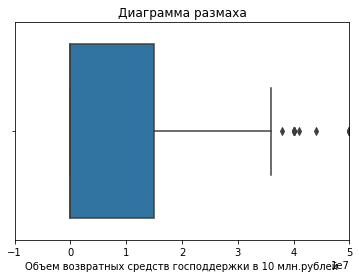

In [37]:
# диаграмма размаха для столбца "refundable_support":
sns.boxplot(df['refundable_support'])
plt.title('Диаграмма размаха')
plt.xlabel('Объем возвратных средств господдержки в 10 млн.рублей')
plt.xlim(-10000000, 50000000)
plt.show()

Нормальные значения находятся в пределах до 35 млн.рублей. Создадим стобец, показывающий наличие нетипичных значений для столбца "refundable_support".

In [38]:
df['unusual_refundable_support'] = df['refundable_support'] > 35000000

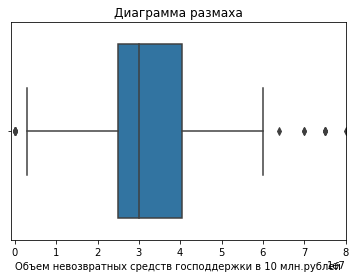

In [39]:
# диаграмма размаха для столбца "nonrefundable_support":
sns.boxplot(df['nonrefundable_support'])
plt.title('Диаграмма размаха')
plt.xlabel('Объем невозвратных средств господдержки в 10 млн.рублей')
plt.xlim(-1000000, 80000000)
plt.show()

В данном случае нормальные значения находятся в пределах от 2.5 до 60 млн.рублей. Создадим стобец, показывающий наличие нетипичных значений для столбца "nonrefundable_support".

In [40]:
df['unusual_nonrefundable_support'] = (df['nonrefundable_support'] > 60000000) | (df['nonrefundable_support'] < 2500000)

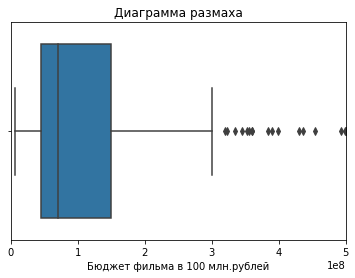

In [41]:
# диаграмма размаха для столбца "budget":
sns.boxplot(df['budget'])
plt.title('Диаграмма размаха')
plt.xlabel('Бюджет фильма в 100 млн.рублей')
plt.xlim(0, 500000000)
plt.show()

Нормальные значения находятся в пределах от 1 до 300 млн.рублей. Столбец для аномальных значений "budget":

In [42]:
df['unusual_budget'] = (df['budget'] > 300000000) | (df['budget'] < 1000000)

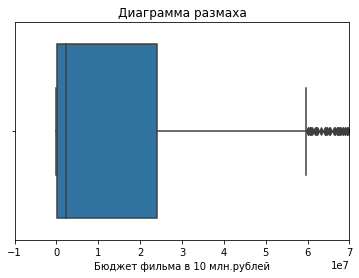

In [43]:
# диаграмма размаха для столбца "box_office":
sns.boxplot(df['box_office'])
plt.title('Диаграмма размаха')
plt.xlabel('Бюджет фильма в 10 млн.рублей')
plt.xlim(-10000000, 70000000)
plt.show()

Здесь аномальные значения начинаются от 60 млн.рублей. Создадим столбец для таких значений:

In [44]:
df['unusual_box_office'] = df['box_office'] > 60000000

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Добавим столбец "year_show_start":

In [45]:
df['year_show_start'] = df['show_start_date'].dt.year
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,unusual_refundable_support,unusual_nonrefundable_support,unusual_budget,unusual_box_office,year_show_start
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз,Кобальт Пикчерз,Бикон Пикчерз...",США,Кевин Костнер,"Дэвид Валдес,Кевин Костнер,Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,False,False,False,False,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,не определен,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,6.60,"драма,военный",NaN,False,False,False,False,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз,Кикстарт Продакшнз,Марк Плат...",США,Тимур Бекмамбетов,"Джим Лемли,Джейсон Нетер,Марк Е.Платт,Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,False,False,False,False,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз,Кикстарт Продакшнз,Марк Плат...",США,Тимур Бекмамбетов,"Джим Лемли,Джейсон Нетер,Марк Е.Платт,Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,False,False,False,False,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз,Кикстарт Продакшнз,Марк Плат...",США,Тимур Бекмамбетов,"Джим Лемли,Джейсон Нетер,Марк Е.Платт,Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,False,False,False,False,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Создадим собственную функцию для создания столбцов "main_director" и "main_genre".

In [46]:
def get_main(cell):
    return cell.split(',')[0]

In [47]:
# добавляем столбцы:
df['main_director'] = df['director'].apply(get_main)
df['main_genre'] = df['genres'].apply(get_main)

Проверим значения в добавленных столбцах.

In [48]:
df['main_director'].value_counts()

О.Семёнова            60
Д.Червяцов            17
Стивен Содерберг      17
Ридли Скотт           16
Тиль Швайгер          14
                      ..
Джулиан Розефельдт     1
Джеймс Мэтер           1
Йоганнес Вайланд       1
Жюли Дельпи            1
К.Сафина               1
Name: main_director, Length: 4603, dtype: int64

In [49]:
df['main_genre'].value_counts()

драма              1688
не определен        976
комедия             697
боевик              617
ужасы               573
мультфильм          538
триллер             521
фантастика          410
мелодрама           383
фэнтези             358
документальный      219
аниме                74
мюзикл               64
детектив             56
приключения          55
военный              46
криминал             39
биография            33
семейный             32
детский              28
история              26
короткометражка      13
концерт              12
спорт                 9
музыка                7
вестерн               7
для взрослых          3
реальное ТВ           1
фильм-нуар            1
Name: main_genre, dtype: int64

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Добавим столбец с указанием доли государственной поддержки от общего бюджета.

In [50]:
df['support_ratio'] = round((df['refundable_support'] + df['nonrefundable_support']) / df['budget'], 2)
df[df['financing_source'].notna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,unusual_refundable_support,unusual_nonrefundable_support,unusual_budget,unusual_box_office,year_show_start,main_director,main_genre,support_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян,М.Бабаханов,Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"драма,мелодрама","365,353.60",False,False,False,False,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,не определен,"28,140.00",False,False,False,False,2014,А.Якимчук,не определен,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров,С.Комаров","Р.Давлетьяров,А.Котелевский,А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"комедия,фантастика","19,957,031.50",False,True,False,False,2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,драма,"55,917.50",False,False,False,False,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе,Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,драма,"232,100.00",False,False,False,False,2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов,К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,"история,биография,драма","717,703,185.53",True,True,True,True,2019,А.Кравчук,история,0.51
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт,К.Феоктистов","С.Сельянов,А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,"мультфильм,приключения,семейный","501,069,235.00",True,True,False,True,2019,Д.Шмидт,мультфильм,0.53
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"",ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук,М.Врубель,А.Андрющенко,Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,"фантастика,боевик",NaN,True,True,True,False,2019,Ф.Бондарчук,фантастика,0.53
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,драма,NaN,False,False,False,False,2019,И.Северов,драма,0.65


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Посчитаем какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах от всего датафрейма.

In [51]:
round(df['box_office'].notna().sum() / len(df['box_office']), 2)

0.42

Создадим сводную таблицу с указанием числа фильмов, суммой сборов и долей, вышедших в прокат фильмов от общего количества фильмов за каждый год.

In [52]:
# выберем только те фильмы, которые были в прокате в кинотеатрах:
df_filtered = df[df['box_office'].notna()]
df_filtered_count_sum = df_filtered.pivot_table(index='year_show_start', 
                                                values='box_office', 
                                                aggfunc=['count', 'sum'])

df_filtered_count_sum.columns = ['count', 'sum']
df_filtered_count_sum['ratio'] = df_filtered_count_sum['count'] / df['year_show_start'].value_counts()
df_filtered_count_sum

,count,sum,ratio
year_show_start,,,
2010,105,"2,428,654.00",0.11
2011,109,"14,102,765.00",0.18
2012,128,"6,955,423.00",0.22
2013,184,"29,799,706.20",0.29
2014,279,"7,444,951,859.20",0.35
2015,465,"39,497,365,196.40",0.66
2016,526,"47,866,299,741.91",0.64
2017,357,"48,563,707,217.51",0.71
2018,475,"49,668,403,134.32",0.53


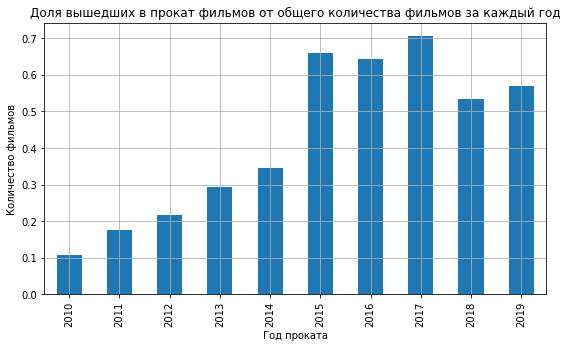

In [53]:
(df_filtered_count_sum
    .plot(kind='bar', grid=True, figsize=(9, 5), y='ratio', 
          title='Доля вышедших в прокат фильмов от общего количества фильмов за каждый год', 
          legend = False))

plt.xlabel('Год проката')
plt.ylabel('Количество фильмов')
plt.show()

Доля фильмов, выходящих в прокат плавно увеличивалась в период с 2010 до 2014 года (с 1 до 3,5 %). В 2015 году эта доля резко возросла до 6,6 % от общего числа фильмов за каждый год. Пик приходится на 2017 год - около 7,1 %. Далее наблюдается снижение выхода фильмов в прокат в 2018 и 2019 году (5,3 и 5,7 % соответственно). 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

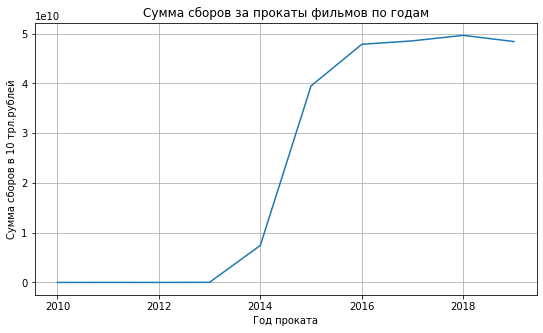

In [54]:
(df_filtered_count_sum
    .plot(kind='line', grid=True, figsize=(9, 5), y='sum', title='Сумма сборов за прокаты фильмов по годам', 
          legend = False))

plt.xlabel('Год проката')
plt.ylabel('Сумма сборов в 10 трл.рублей')
plt.show()

Минимальная сумма сборов:

In [55]:
df_filtered_count_sum['sum'].min()

2428654.0

Максимальная сумма сборов:

In [56]:
df_filtered_count_sum['sum'].max()

49668403134.31999

Динамика сборов денежных средств возрастает с каждым годом. При этом резкий рост начинается с 2013 по 2016 год. Максимальное значение сборов приходится на 2018 год. Однако количество фильмов в 2018 году не было максимальным. 

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [57]:
df_filtered_mean_median = df_filtered.pivot_table(index='year_show_start', 
                                                  values='box_office', 
                                                  aggfunc=['mean', 'median'])
df_filtered_mean_median.columns = ['mean', 'median']
df_filtered_mean_median['mean'] = round(df_filtered_mean_median['mean'], 2)
df_filtered_mean_median['median'] = round(df_filtered_mean_median['median'], 2)
df_filtered_mean_median

,mean,median
year_show_start,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


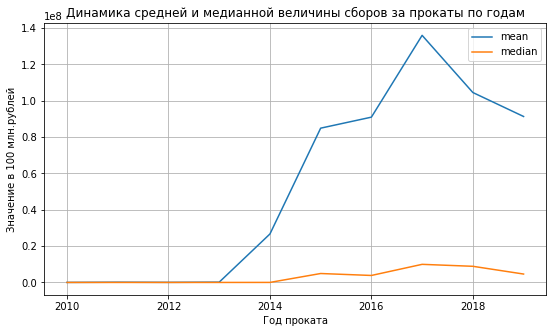

In [58]:
(df_filtered_mean_median
    .plot(grid=True, figsize=(9, 5), y=['mean', 'median'], 
     title='Динамика средней и медианной величины сборов за прокаты по годам'))

plt.xlabel('Год проката')
plt.ylabel('Значение в 100 млн.рублей')
plt.show()

Медианное значение сборов находится в близких значениях до 2014 года, потом наблюдается рост. При этом динамика медианной величины не является такой резкой как динамика средней. Средняя величина резко возрастает с 2013 года и имеет пик в 2017 году. В 2017 году вышло меньше фильмов, чем в предыдущий 2016 год и последующий 2018 год. Но эти фильмы в среднем имели больше сборов.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [59]:
# отфильтруем фильмы с 2015 по 2019 год:
df_filtered = df_filtered[df_filtered['year_show_start'] >= 2015] 

# создадим сводную таблицу:
df_filtered_age_restriction_sum = df_filtered.pivot_table(index='age_restriction', 
                                                          values='box_office',
                                                          aggfunc=['count','sum', 'mean'])

df_filtered_age_restriction_sum.columns = ['count','sum', 'mean']
df_filtered_age_restriction_sum['mean'] = round(df_filtered_age_restriction_sum['mean'])
df_filtered_age_restriction_sum.sort_values(by='sum')

,count,sum,mean
age_restriction,,,
«0+» - для любой зрительской аудитории,91,"809,077,425.97","8,890,961.00"
«18+» - запрещено для детей,792,"40,759,615,572.12","51,464,161.00"
«6+» - для детей старше 6 лет,317,"55,798,610,799.68","176,020,854.00"
«12+» - для детей старше 12 лет,348,"60,619,446,628.33","174,193,812.00"
«16+» - для детей старше 16 лет,805,"76,034,733,643.63","94,453,085.00"


Больше всего денежных средств собрали фильмы с категорией "16+", меньше всего с категорией "0+". При этом количество фильмов данных категории является максимальным и минимальным соответственно. Самые высокие показатели средних значений сборов приходятся на категории "6+" и "12+". Построим график динамики суммы сборов для фильмов с разными возрастными категориями по годам.

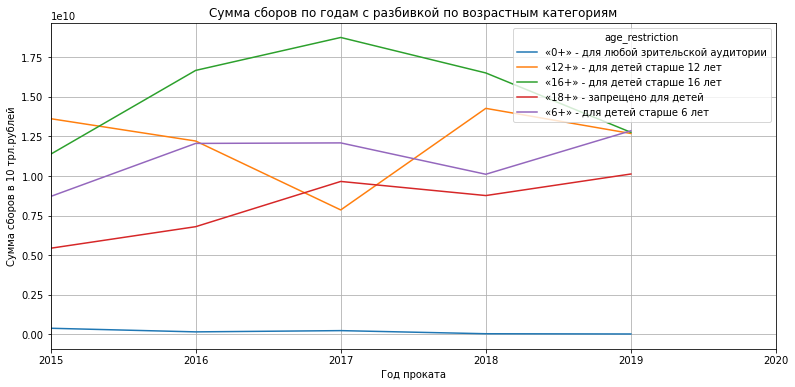

In [60]:
(df_filtered.pivot_table(index='year_show_start', 
                        columns='age_restriction', 
                        values='box_office', 
                        aggfunc='sum')
     .plot(grid=True, figsize=(13, 6), title='Сумма сборов по годам с разбивкой по возрастным категориям', 
      kind='line', xlim=[2015, 2020]))
plt.xlabel('Год проката')
plt.ylabel('Сумма сборов в 10 трл.рублей')
plt.show()

Для фильмов с категорией "0+" динамика остается практически неизменной. Такие фильмы вообще имеют наименьшие сборы, они ориентированы на самых маленьких зрителей, и не столь интересны для других возрастных групп. До 2017 года наблюдается рост сборов для категорий "16+", "6+" и "18+". При этом для категория "12+" наблюдается снижение сборов. Похоже в 2017 году фильмы с такой категорией оказались менее популярными. В целом такой график отображает посещаемость фильмов той или иной категории в разные годы. 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Посмотрим размер государственной поддержки, оказываемой по годам.

In [61]:
# выберем только те фильмы, которым была оказана государственная поддержка
df_state_support = df[df['financing_source'].notna()]

Добавим столбец с указанием суммы государственной поддержки для каждого фильма.

In [62]:
df_state_support['all_support'] = df_state_support['refundable_support'] + df_state_support['nonrefundable_support']

Создадим сводную таблицу с указанием количества фильмов с господдержкой и суммой господдержки по годам.

In [63]:
df_state_support_sum = df_state_support.pivot_table(index='year_show_start', 
                                                    values='all_support', 
                                                    aggfunc=['count', 'sum'])

df_state_support_sum.columns = ['count', 'sum']
df_state_support_sum

,count,sum
year_show_start,,
2013,2,"134,347,945.00"
2014,16,"572,002,299.00"
2015,86,"3,656,241,459.00"
2016,61,"4,303,155,482.00"
2017,41,"3,183,971,662.00"
2018,56,"3,446,969,465.00"
2019,70,"4,904,000,000.00"


Больше всего фильмов, которые получили господдержку, вышли в 2015 году, таких 86. Меньше всего фильмов в 2013 году, их всего 2.

Посмотрим как распределялись суммы государственной поддержки по годам:

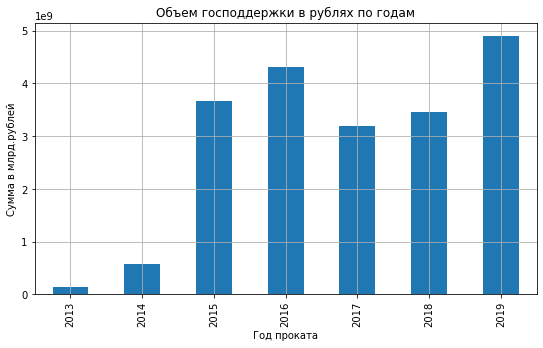

In [64]:
(df_state_support_sum
    .plot(kind='bar', grid=True, figsize=(9, 5), y='sum', title='Объем господдержки в рублях по годам',
          legend = False))

plt.xlabel('Год проката')
plt.ylabel('Сумма в млрд.рублей')
plt.show()

В целом наблюдается большее участие государства в поддержке фильмов, начиная с 2015 года.

Посмотрим фильмы каких жанров получили большую государственную поддержку.

In [65]:
df_state_support_sum_genres = df_state_support.pivot_table(index='main_genre', 
                                                    values='all_support', 
                                                    aggfunc=['count', 'sum'])

df_state_support_sum_genres.columns = ['count', 'sum']
df_state_support_sum_genres.sort_values(by='sum', ascending=False)

,count,sum
main_genre,,
драма,93,"5,314,406,632.00"
комедия,74,"3,218,282,945.00"
мультфильм,31,"2,461,520,000.00"
фантастика,11,"1,406,000,000.00"
фэнтези,11,"1,032,900,000.00"
история,4,"1,020,000,000.00"
триллер,15,"769,645,285.00"
приключения,7,"696,000,000.00"
не определен,16,"688,969,465.00"


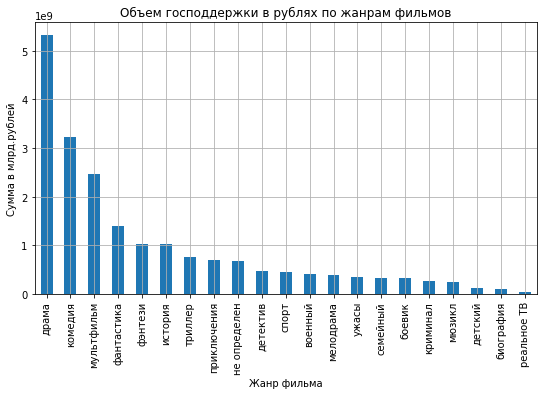

In [66]:
(df_state_support_sum_genres.sort_values(by='sum', ascending=False)
    .plot(kind='bar', grid=True, figsize=(9, 5), y='sum', title='Объем господдержки в рублях по жанрам фильмов',
          legend = False))

plt.xlabel('Жанр фильма')
plt.ylabel('Сумма в млрд.рублей')
plt.show()

Наибольшую поддержку получают фильмы с жанром "драма". Далее идут фильмы с жанром "комедия" и мультфильмы.

Посмотрим сколько фильмов, получивших госсподдержку, окупились.

In [67]:
df_state_support['pay_off'] = df_state_support['box_office'] > df_state_support['all_support']
df_state_support['pay_off'].value_counts()

False    214
True     118
Name: pay_off, dtype: int64

118 фильмов окупились, 214 нет. 

Посчитаем средний рейтинг у окупившихся и не окупившихся фильмов.

In [68]:
round(df_state_support.loc[(df_state_support['pay_off'] == True), 'ratings'].mean(), 3)  

6.044

In [69]:
round(df_state_support.loc[(df_state_support['pay_off'] == False), 'ratings'].mean(), 3)  

6.007

Похоже рейтинг не влияет на окупаемость фильма. 

Посмотри соотношение рейтингов по жанрам фильмов.

In [70]:
genre_raiting = df_state_support.pivot_table(index='main_genre', values='ratings', aggfunc='mean')
genre_raiting.columns = ['mean']
genre_raiting = genre_raiting.sort_values(by='mean', ascending=False)
genre_raiting 

,mean
main_genre,
криминал,7.50
детский,7.12
спорт,6.93
биография,6.90
детектив,6.76
боевик,6.58
мюзикл,6.55
военный,6.47
драма,6.42


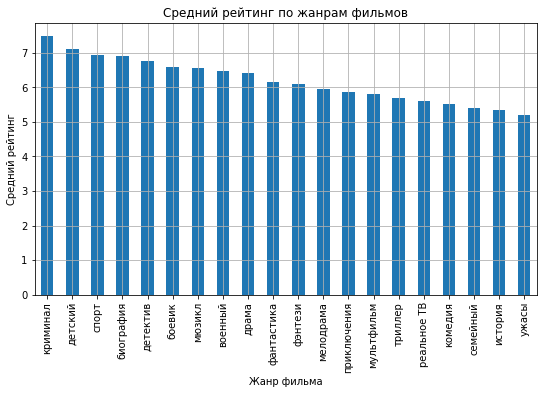

In [71]:
(genre_raiting.sort_values(by='mean', ascending=False)
    .plot(kind='bar', grid=True, figsize=(9, 5), y='mean', title='Средний рейтинг по жанрам фильмов', 
          legend = False))

plt.xlabel('Жанр фильма')
plt.ylabel('Средний рейтинг')
plt.show()

Проверим зависит ли окупаемость от жанра.

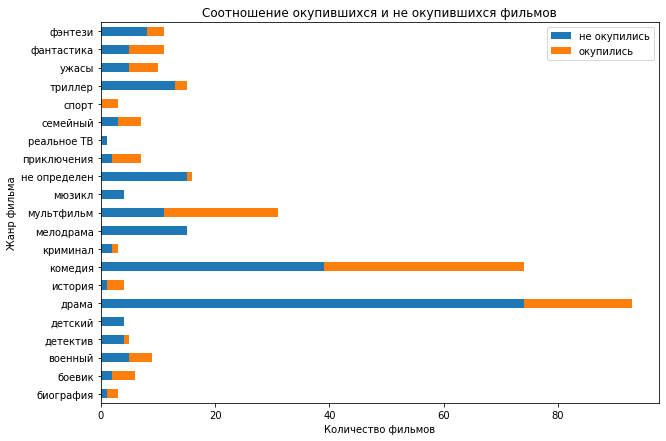

In [72]:
df_state_support.pivot_table(index='main_genre', columns='pay_off', aggfunc='size').plot.barh(figsize=(10, 7), stacked=True)

plt.title("Соотношение окупившихся и не окупившихся фильмов")
plt.xlabel('Количество фильмов')
plt.ylabel('Жанр фильма')
plt.legend(['не окупились', 'окупились'])
plt.show()

Судить об окупаемости того или иного жанра можно, если в заданном жанре достаточное количество фильмов. В связи с этим сравним жанры "мультфильм", "комедия" и "драма". Самый окупаемый жанр - "мультфильм", далее "комедия". Жанр "драма" окупается плохо.

### Шаг 5. Общий вывод

Целью данного исследование была необходимость изучить рынок российского кинопроката и выявить текущие тренды. Так же были рассмотрены фильмы, которые получили государственную поддержку на предмет окупаемости таких фильмов. 

В целом количество фильмов, выходящих в российский кинопрокат, стало увеличиваться, начиная с 2012 года, а с 2015 года имеет более постоянную величину. 

При этом сборы денежных средств от кинопроката увеличивается соответственно увеличению количества выходящих фильмов. Максимальное значение сборов приходится на 2018 год.

Далее были рассмотрены категории фильмов с целью выявления той категории, которая имеет максимальные сборы. Наиболее прибыльными фильмами стали фильмы с категориями "6+" и "12+", наименее прибыльными - "0+". 

Далее были проанализированы фильмы, получившие государственную поддержку, на предмет окупаемости. В целом наблюдается большее участие государства в оказании содействия, начиная с 2015 года. При этом окупившихся фильмов меньше, чем не окупившихся (118 против 214 фильмов). 
В частности были рассмотрены три жанра, которые получили наибольшую поддержку: "драма", "комедия" и "мультфильмы".
В ходе исследования было установлено, что рейтинг фильма не имеет влияния на окупаемость. Средний рейтинг жанра "драма" - 6,4, "комедия" - 5,5, "мультфильмы" - 5,8. Однако, самым окупаемым жанром стали мультфильмы, а наименее окупаемым - "драма", не смотря на более высокий рейтинг.


